In [1]:
import os
os.environ["BRASA_DATA_PATH"] = "D:\\brasa"

import sys
sys.path.append('..')

from datetime import datetime

import pandas as pd
import pyarrow as pa
import pyarrow.dataset as ds
import pyarrow.compute as pc

import brasa

In [2]:
man = brasa.CacheManager()

In [3]:
ds_futures_reg = brasa.get_dataset("b3-futures-register")

In [6]:
df_futures_reg = ds_futures_reg.to_table().to_pandas()

In [7]:
df_futures_reg.instrument_asset.unique()

array(['CFS', 'WDO', 'DDI', 'DAP', 'DCO', 'OC1', 'DOL', 'DI1', 'WIN',
       'IND', 'ICF', 'CCM', 'SJC', 'BGI', 'FRP', 'ETH', 'ISP', 'SFI',
       'SCS', 'EUR', 'T10', 'JPY', 'MIX', 'MXN', 'ZAR', 'JSE', 'CAD',
       'AUD', 'TRY', 'NZD', 'GBP', 'CNY', 'CLP', 'CHF', 'BRI', 'WEU',
       'WTI', 'HSI', 'BSE', 'OZ1', 'PETRP', 'KROTO', 'PSSAO', 'VALEO',
       'B3SAO', 'PCARP', 'HYPEO', 'CMIGP', 'VVARO', 'USIMA', 'CIELO',
       'CCROO', 'ARB', 'CNH', 'RUB', 'SEK', 'NOK', 'CHL', 'AFS', 'TUQ',
       'MEX', 'SWI', 'NZL', 'CAN', 'WSP', 'JAP', 'AUS', 'GBR', 'EUP',
       'COGNO', 'ARS', 'INK', 'IMV', 'PCARO', 'PCARI', 'VIIAO', 'SOY',
       'ESX', 'DAX', 'BBASO', 'ITSAP', 'ITUBP', 'SUZBO', 'JBSSO', 'MGLUO',
       'LRENO', 'RENTO', 'WEGEO', 'BBDCP', 'GGBRP', 'ABEVO', 'NTCOO',
       'ELETO', 'CSNAO', 'XFI'], dtype=object)

In [20]:
frp = brasa.get_dataset("b3-trades-intraday").filter(pc.field("symbol") == "FRP0").to_table().to_pandas()

In [24]:
frp.columns

Index(['refdate', 'symbol', 'update_action', 'traded_price', 'traded_quantity',
       'trade_time', 'trade_id', 'trade_session_id', 'trade_date',
       'buyer_code', 'seller_code'],
      dtype='object')

In [29]:
frp.trade_time = pd.to_datetime(frp.refdate.dt.strftime("%Y-%m-%d") + " " + frp.trade_time, format="%Y-%m-%d %H%M%S%f")

<Axes: xlabel='trade_time'>

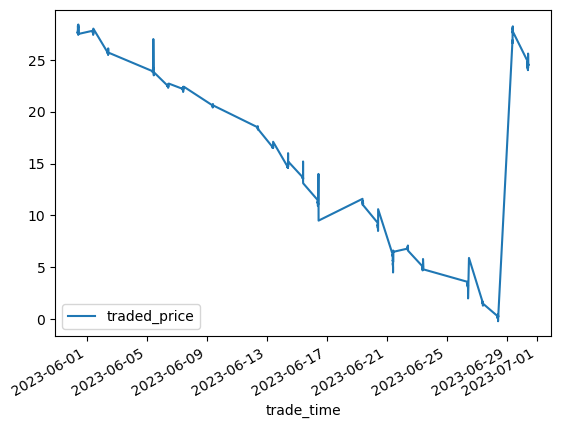

In [31]:
frp.plot(x="trade_time", y="traded_price")